In [34]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [35]:
#creating the time gride
T = 100.0 #time interval
dt = 0.02 #step size
N = int(T / dt) + 1 # number of time steps
t = numpy.linspace(0.0, T, num=N) #time gride
t_arange = numpy.arange(0.0, T + .02 , dt)

In [36]:
print(t)
print(t_arange)

[0.000e+00 2.000e-02 4.000e-02 ... 9.996e+01 9.998e+01 1.000e+02]
[0.000e+00 2.000e-02 4.000e-02 ... 9.996e+01 9.998e+01 1.000e+02]


In [37]:
?numpy.linspace

In [53]:
#inital conditions
z0 = 100.0 #height
b0 = 10.0
zt = 100.0 
g = 9.81 #acceleration in gravity field

#inital value of numeric solution
u = numpy.array([z0, b0])

#array to store the values of altitude at each time step
z = numpy.zeros(N)
z[0] = z0

In [54]:
#time integration with euler

for n in range (1, N):
    rhs = numpy.array([u[1], g * (1 - u[0] / zt)])
    u = u + dt * rhs
    z[n] = u[0]
print(z)

[100.         100.2        100.4        ...  96.20588732  96.42520884
  96.64467925]


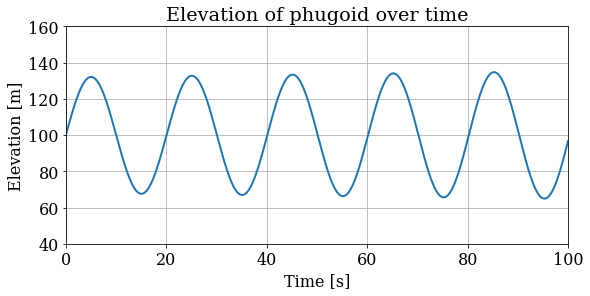

In [55]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

pyplot.figure(figsize=(9.0, 4.0))
pyplot.title('Elevation of phugoid over time')
pyplot.xlabel('Time [s]')
pyplot.ylabel('Elevation [m]')
pyplot.xlim(t[0], t[-1])
pyplot.ylim(40.0, 160.0)
pyplot.grid()
pyplot.plot(t,z,color='C0', linestyle='-',linewidth=2);

In [57]:
z_exact = (b0 * (zt / g)**0.5 * numpy.sin( (g / zt)**0.5 * t) +
          (z0 - zt)* numpy.cos(( g / zt)**0.5 * t) + zt)

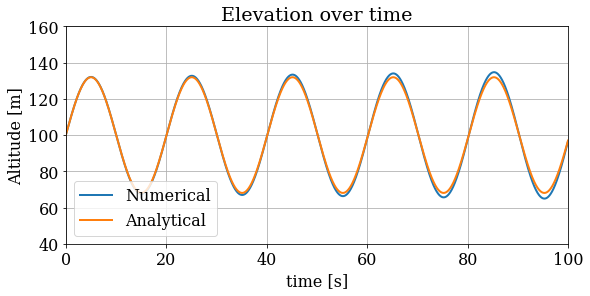

In [61]:
pyplot.figure(figsize= (9.0, 4.0))
pyplot.title("Elevation over time")
pyplot.xlabel('time [s]')
pyplot.ylabel('Altitude [m]')
pyplot.xlim(t[0], t[-1])
pyplot.ylim(40.0, 160.0)

pyplot.grid()
pyplot.plot(t, z, label = 'Numerical',
           color='C0', linestyle='-', linewidth=2)
pyplot.plot(t, z_exact, label='Analytical',
            color='C1', linestyle='-', linewidth=2)
pyplot.legend();
            

In [71]:
#checking for convergence
#list of time steps
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]


#empty list to contain the solutions of each grid

z_values = []

for dt in dt_values:
    N = int(T / dt) + 1 #number of timesteps
    t = numpy.linspace(0.0, T, num=N) #time grid
    
    #inital conditions
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    #intergration with Eulers
    for n in range (1,N):
        rhs = numpy.array([u[1], g *(1 - u[0]/zt)])
        u = u + dt * rhs
        z[n] = u[0] #stores the elevation for the time step
    z_values.append(z) #adds the values of elevation over time


print(z_values)



[array([100.        , 101.        , 102.        , ...,  91.2989138 ,
        92.90712607,  94.5238741 ]), array([100.        , 100.5       , 101.        , ...,  94.75726869,
        95.39076488,  96.02554684]), array([100.        , 100.1       , 100.2       , ...,  96.60653005,
        96.71101708,  96.81553741]), array([100.        , 100.05      , 100.1       , ...,  96.79319077,
        96.84418536,  96.89518782]), array([100.        , 100.01      , 100.02      , ...,  96.93628874,
        96.94629199,  96.95629554]), array([100.        , 100.001     , 100.002     , ...,  96.96774265,
        96.96873863,  96.9697346 ])]


In [72]:
def l1_error(z, z_exact, dt):
  

    error = dt * numpy.sum(numpy.abs(z - z_exact))
    return error

In [78]:

error_values = []
print(dt_values)
for z, dt in zip(z_values, dt_values):
    N = int(T / dt) + 1 #time grid
    t = numpy.linspace(0.0 , T, num=N)
    #exact solution
    z_exact = (b0 * (zt / g)**0.5 * numpy.sin( (g / zt)**0.5 * t) +
          (z0 - zt)* numpy.cos(( g / zt)**0.5 * t) + zt)
    #L1 - norm calc
    error_values.append(l1_error(z, z_exact, dt))
    print(error_values)

[0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]
[595.3673383328402]
[595.3673383328402, 272.677397541061]
[595.3673383328402, 272.677397541061, 50.966869623300894]
[595.3673383328402, 272.677397541061, 50.966869623300894, 25.272694300523963]
[595.3673383328402, 272.677397541061, 50.966869623300894, 25.272694300523963, 5.0211942196806]
[595.3673383328402, 272.677397541061, 50.966869623300894, 25.272694300523963, 5.0211942196806, 0.5013737080649123]


[0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]


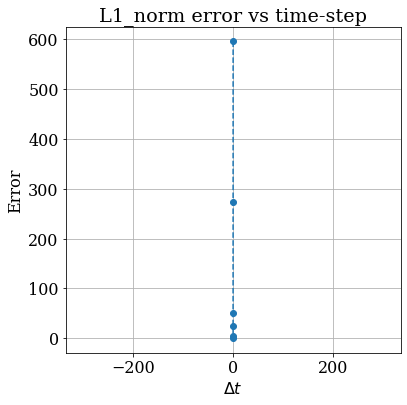

In [81]:
print(dt_values)
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1_norm error vs time-step')
pyplot.xlabel('$\Delta t$')
pyplot.ylabel('Error')
pyplot.grid()
#pyplot.plot(dt_values, error_values, color="C0", linestyle='--', marker='o') #log log plot
pyplot.axis('equal'); 

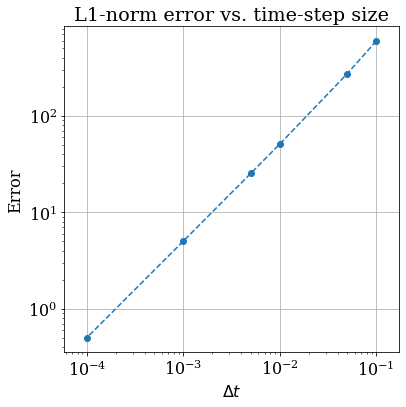

In [82]:
# Plot the error versus the time-step size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm error vs. time-step size')  # set the title
pyplot.xlabel('$\Delta t$')  # set the x-axis label
pyplot.ylabel('Error')  # set the y-axis label
pyplot.grid()
pyplot.loglog(dt_values, error_values,
              color='C0', linestyle='--', marker='o')  # log-log plot
pyplot.axis('equal');  # make axes scale equally